# Predicting Online Sales with Data Analytics:

**Domain**: Data Analysis + Regression Modeling  
**Dataset**:AliExpress Dataset (2024)  
**Tools:** Python, Pandas, Seaborn, Scikit-learn, Matplotlib  
**Goal:** Predict how many items will be sold based on price and shipping tag.

## Problem Statement:

Platforms like AliExpress offer thousands of products daily.  
To manage stock and boost performance, it's important to **predict which products will sell more**.  
This project builds a Machine Learning model to estimate product sales based on price and tagText.


## Importing the Required Libraries:

In [2]:
# Importing the basic Python libraries that I will need for data handling and model building

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn tools for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


## Loading the Dataset:

In [3]:
# Loading the furniture dataset which was scraped from AliExpress
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")

# Just checking how the data looks at the top
df.head()


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


## Dataset Info :
There are 5 columns in the dataset:
- **productTitle:** Product name (text)
- **price:** Price shown on the site (string with "$")
- **originalPrice:** Original price (many nulls, I will remove it)
- **tagText:** Shipping info like 'Free shipping' or '$5.09 shipping'
- **sold:** Target variable — how many units sold

Total rows: 445

## Cleaning the Data:


In [7]:
# Dropping 'originalPrice' because it has too many missing values and we won't use it
df.drop(['originalPrice'], axis=1, inplace=True)

# Cleaning 'price' column by removing $ and commas, and converting to float
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Simplifying shipping tag — keeping only Free Shipping, $5.09, and grouping rest as 'others'
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

# Encoding tagText column so that ML models can understand it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

# Previewing the cleaned dataset
df.head()



,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,0
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,0
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,0
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,0
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,0


## Visualizing the Data:

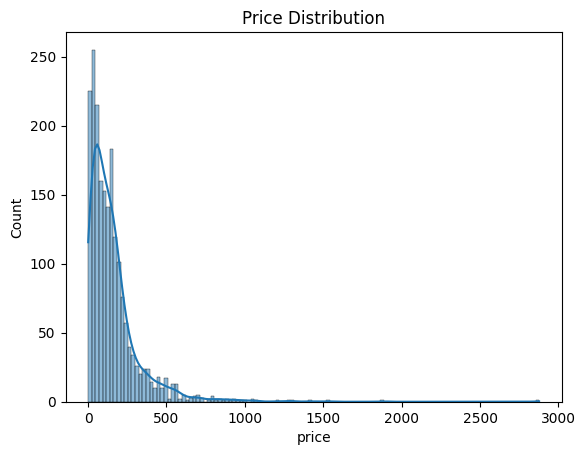

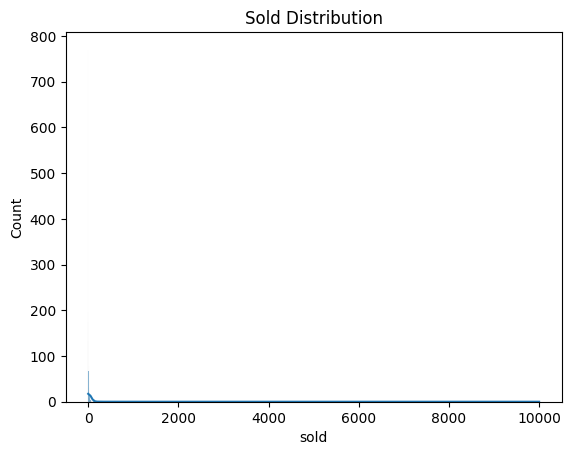

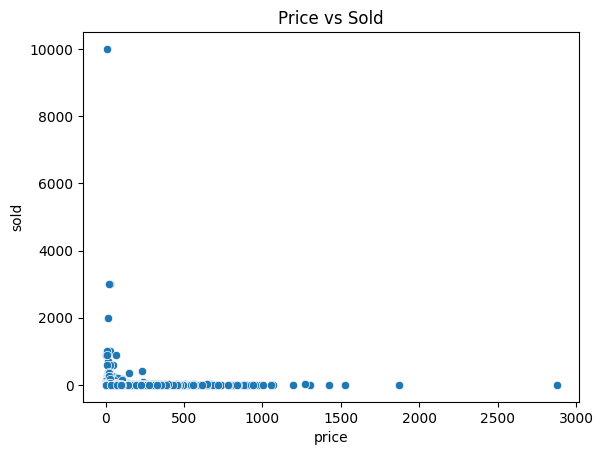

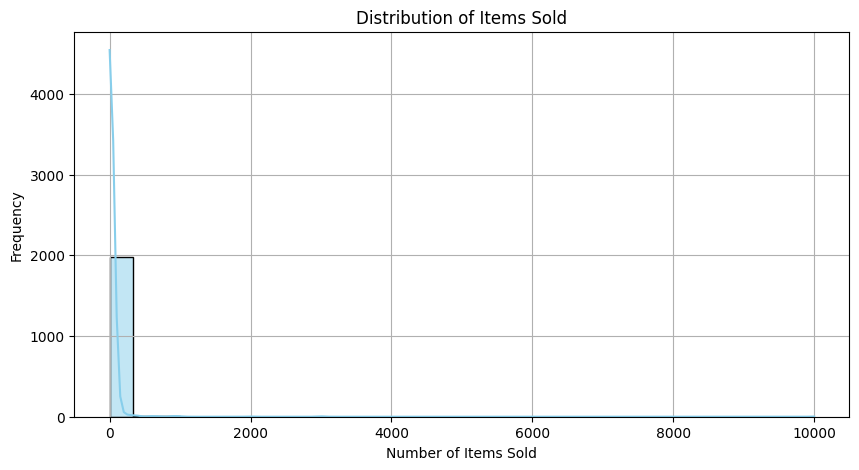

In [8]:
# Checking how prices are distributed
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Checking how many items were sold (distribution)
sns.histplot(df['sold'], kde=True)
plt.title("Sold Distribution")
plt.show()

# Looking at the relationship between price and sold
sns.scatterplot(x='price', y='sold', data=df)
plt.title("Price vs Sold")
plt.show()

# Visualizing the distribution of items sold
plt.figure(figsize=(10, 5))
sns.histplot(df['sold'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Items Sold")
plt.xlabel("Number of Items Sold")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



## Model Training:

In [9]:
# Preparing the features (X) and the target column (y)
X = df.drop(['sold', 'productTitle'], axis=1)
y = df['sold']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using two models: Linear Regression and Random Forest
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting both models on training data
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Checking Model Performance:

In [10]:
# Predicting the values using both models
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Calculating MSE and R² score for both models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Showing the performance metrics
print("Linear Regression → MSE:", round(mse_lr, 2), "| R²:", round(r2_lr, 2))
print("Random Forest → MSE:", round(mse_rf, 2), "| R²:", round(r2_rf, 2))


Linear Regression → MSE: 5398.36 | R²: 0.02
Random Forest → MSE: 11621.95 | R²: -1.12


## Model Performance Analysis


### Observation:
- The **R² score for Linear Regression is very low (0.02)** which means the model explains only 2% of the variance in the target variable (`sold`). Still, it performs **better than Random Forest** in this case.
- The **Random Forest model performed worse**, with a **negative R² score (-1.12)**, which means it performed worse than just predicting the mean of `sold` every time.
- **MSE is also very high** in both models, indicating poor prediction accuracy.

### Possible Reasons:
- The dataset might be **too small (only 445 rows)** for Random Forest to learn useful patterns.
- The features used (`price`, `tagText`) may not be sufficient to predict sales — more detailed information like product category, rating, or product description could help.
- The **target variable (`sold`) might be very skewed**, which affects model learning.





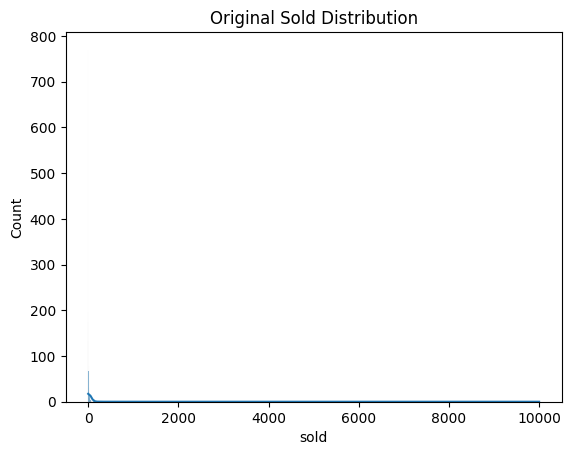

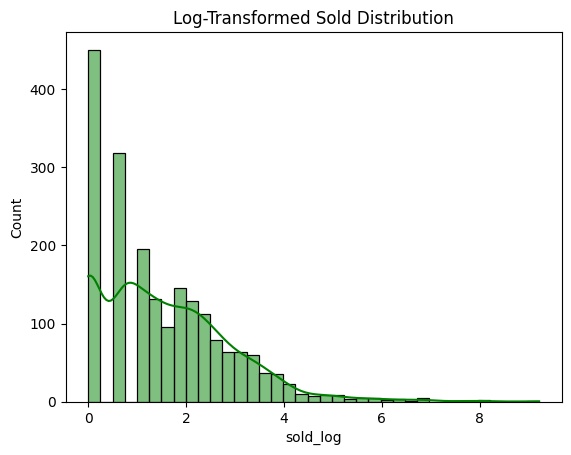

In [11]:
# Visualizing original distribution
sns.histplot(df['sold'], kde=True)
plt.title("Original Sold Distribution")
plt.show()

# Applying log transformation (log1p handles zeroes safely)
df['sold_log'] = np.log1p(df['sold'])

# Visualizing transformed distribution
sns.histplot(df['sold_log'], kde=True, color='green')
plt.title("Log-Transformed Sold Distribution")
plt.show()


## Distribution of Items Sold

The histogram below shows that **most products in the dataset have very low sales**,  
and only a few products have very high sales ... this creates a **right-skewed distribution**.  
The tall bar on the left is expected and shows the concentration of low-sale products.

This insight is useful for businesses to understand that **only a few products drive major revenue**,  
and most items have limited traction.


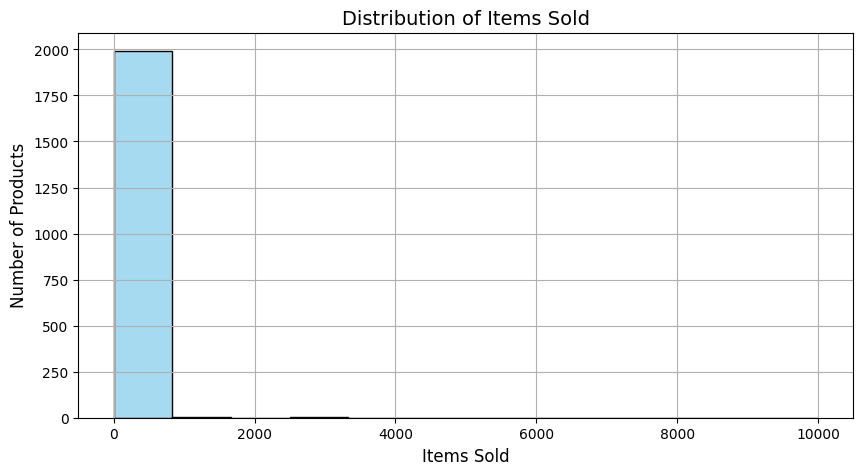

In [14]:

# Set the plot size
plt.figure(figsize=(10, 5))

# Basic histogram for raw sold values
sns.histplot(df['sold'], bins=12, kde=False, color='skyblue')

# Titles and labels
plt.title("Distribution of Items Sold", fontsize=14)
plt.xlabel("Items Sold", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


## Conclusion

In this project, I worked on a real-world edataset containing furniture products.  

### Key Learnings & Results:
- The data was **highly skewed**, with most products having low sales and few with very high sales.
- I visualized important patterns like **price vs sold** and **distribution of sales**.
- Two machine learning models were applied:
  - **Linear Regression** gave an R² score of `0.02`
  - **Random Forest** gave a lower R² of `-1.12`
---

This project gave me hands-on experience in:
- Data cleaning & preprocessing  
- Feature engineering  
- Exploratory data analysis  
- Building & evaluating regression models

Overall, this was a great learning experience and helped me improve my practical ML and data handling skills.
